# Acquired Immunodeficiency Syndrome (AIDS)

- AIDS (Acquired Immunodeficiency Syndrome) is a disease caused by the HIV (Human Immunodeficiency Virus). This virus weakens the immune system, making the body vulnerable to infections.

- HIV spreads through infected blood, semen, vaginal fluids, and breast milk. It can be transmitted via unprotected sexual contact, sharing infected needles, or from an infected mother to her baby during childbirth or breastfeeding.

- In the early stages, HIV may not show noticeable symptoms. However, over time, it weakens the immune system, leading to symptoms like fatigue, weight loss, fever, and frequent infections.

- There is no permanent cure for AIDS, but Antiretroviral Therapy (ART) helps control HIV and slow its progression. Prevention includes practicing safe sex, using clean needles, and regular HIV testing.

## Question: How does HIV become AIDS?

HIV attacks the immune system, slowly reducing CD4 cells.
Without treatment, it progresses over years, making the body weak.
When CD4 count drops below 200, severe infections lead to AIDS.

# About Dataset

*The AIDS_Classification_50000.csv dataset is a comprehensive resource specifically compiled for researchers and healthcare professionals focusing on the statistical analysis of AIDS (Acquired Immunodeficiency Syndrome). Composed of 50,000 instances, this dataset encapsulates a broad spectrum of clinical and demographic variables related to AIDS patients. Each record in the dataset holds data across 23 columns, indicating various patient attributes including treatment details, demographic information, clinical test results, and disease progression indicators.*

# Importing Libraries

In [126]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, accuracy_score, f1_score,precision_score
import optuna

print("Libraries imported successfully! Ready to proceed")

Libraries imported successfully! Ready to proceed


In [76]:
# Load the data
PATH = "AIDS_Classification_50000.csv"
df = pd.read_csv(PATH)
print("Data loaded successfully!")

Data loaded successfully!


In [77]:
# Printing the first 5 rows of the dataset
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073.0,1.0,37.0,79.46339,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,2.0,0.0,1.0,0.0,322.0,469.0,882.0,754.0,1.0
1,324.0,0.0,33.0,73.02314,0.0,1.0,0.0,90.0,0.0,1.0,...,1.0,3.0,1.0,1.0,1.0,168.0,575.0,1035.0,1525.0,1.0
2,495.0,1.0,43.0,69.47793,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,377.0,333.0,1147.0,1088.0,1.0
3,1201.0,3.0,42.0,89.15934,0.0,1.0,0.0,100.0,1.0,1.0,...,1.0,3.0,0.0,0.0,0.0,238.0,324.0,775.0,1019.0,1.0
4,934.0,0.0,37.0,137.46581,0.0,1.0,0.0,100.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,500.0,443.0,1601.0,849.0,0.0


In [78]:
# Printing the last 5 rows of the dataset
df.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
49995,953.0,3.0,46.0,61.28204,0.0,0.0,0.0,90.0,0.0,1.0,...,1.0,3.0,0.0,1.0,1.0,234.0,402.0,481.0,1014.0,0.0
49996,1036.0,0.0,42.0,73.36768,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,3.0,0.0,0.0,1.0,369.0,575.0,514.0,657.0,0.0
49997,1157.0,0.0,40.0,78.75824,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,308.0,663.0,1581.0,863.0,0.0
49998,596.0,0.0,31.0,52.20371,0.0,0.0,0.0,100.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,349.0,440.0,470.0,865.0,1.0
49999,612.0,2.0,41.0,77.12100,0.0,1.0,0.0,90.0,0.0,1.0,...,1.0,3.0,0.0,1.0,0.0,428.0,396.0,1002.0,696.0,0.0


In [79]:
# Printing the shape of the dataset
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (50000, 23)


In [80]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


# Attribute Description:

- time: Time since the baseline measurement, in days.
- trt: Treatment code (0, 1, 2), where each number signifies a different treatment regimen.
- age: Age of the patient in years. {in the range of [12,68]}
- wtkg: Weight of the patient in kilograms. {in the range of [42, 149]}
- hemo: Presence of Hemophilia (0 = No, 1 = Yes).
- homo: Homosexual behavior (0 = No, 1 = Yes).
- drugs: Drug use (0 = No, 1 = Yes).
- karnof: Karnofsky score indicating patient's functional impairment (scores range from 0 to 100). {min_val, max_val = 76, 100}
- oprior: Number of opportunistic infections prior to study.
- z30: Presence of Z30 gene (0 = No, 1 = Yes).
- preanti: Months before receiving antiretroviral therapy.
- race: Race (0 = Non-white, 1 = White).
- gender: Gender (0 = Female, 1 = Male).
- str2: Stratification variable 2.
- strat: Overall stratification.
- symptom: Presence of specific AIDS-related symptoms (0 = No, 1 = Yes).
- treat: Treatment response (0 = No, 1 = Yes).
- offtrt: Off treatment (0 = No, 1 = Yes).
- cd40: CD4 count at the baseline. {in the range [236, 930]}
- cd420: CD4 count at 20 weeks. {in the range [327, 1119]}
- cd80: CD4 count at 8 weeks. {in the range [885, 4656]}
- cd820: CD4 count at 20 weeks post the 8-week measurement. {in the range [649, 3585]}
- infected: HIV infection status (0 = Negative, 1 = Positive).


In [81]:
# cheecking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  float64
 1   trt       50000 non-null  float64
 2   age       50000 non-null  float64
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  float64
 5   homo      50000 non-null  float64
 6   drugs     50000 non-null  float64
 7   karnof    50000 non-null  float64
 8   oprior    50000 non-null  float64
 9   z30       50000 non-null  float64
 10  preanti   50000 non-null  float64
 11  race      50000 non-null  float64
 12  gender    50000 non-null  float64
 13  str2      50000 non-null  float64
 14  strat     50000 non-null  float64
 15  symptom   50000 non-null  float64
 16  treat     50000 non-null  float64
 17  offtrt    50000 non-null  float64
 18  cd40      50000 non-null  float64
 19  cd420     50000 non-null  float64
 20  cd80      50000 non-null  fl

Changing some dtypes to `int32`

In [82]:
df = df.astype({col : 'int32' for col in df.columns if col != 'wtkg'})

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int32  
 1   trt       50000 non-null  int32  
 2   age       50000 non-null  int32  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int32  
 5   homo      50000 non-null  int32  
 6   drugs     50000 non-null  int32  
 7   karnof    50000 non-null  int32  
 8   oprior    50000 non-null  int32  
 9   z30       50000 non-null  int32  
 10  preanti   50000 non-null  int32  
 11  race      50000 non-null  int32  
 12  gender    50000 non-null  int32  
 13  str2      50000 non-null  int32  
 14  strat     50000 non-null  int32  
 15  symptom   50000 non-null  int32  
 16  treat     50000 non-null  int32  
 17  offtrt    50000 non-null  int32  
 18  cd40      50000 non-null  int32  
 19  cd420     50000 non-null  int32  
 20  cd80      50000 non-null  in

Checking for NaN

In [84]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

As we can see here that our dataset is clean.

We can start data visualization

# Data Visualization

### 1) Infected count & pie plot 

Text(0.5, 1.0, 'Count plot of infected')

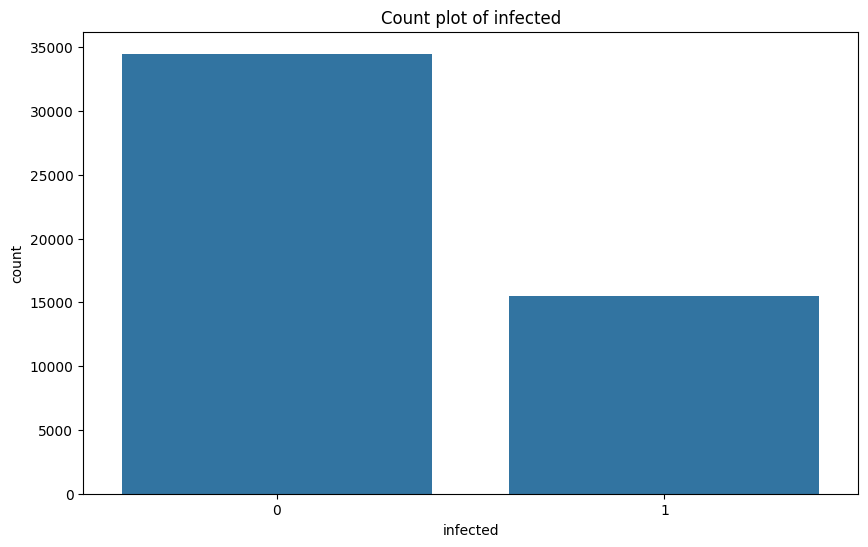

In [85]:
# plotting the count plot infected
plt.figure(figsize=(10, 6))
sns.countplot(x='infected', data=df)
plt.title("Count plot of infected")

infected
0    34494
1    15506
Name: count, dtype: int64


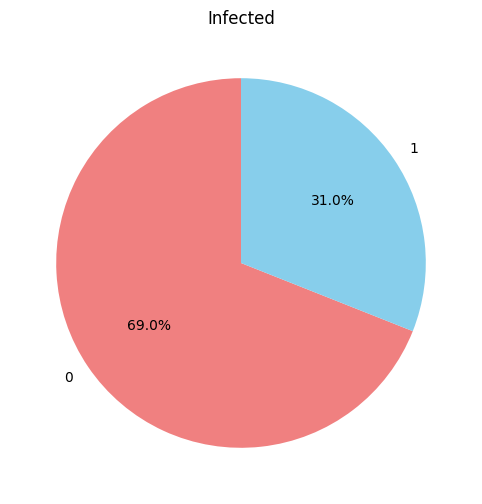

In [86]:
# plotting the pie chart of infected
plt.figure(figsize=(10, 6))
df['infected'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title("Infected")
plt.ylabel("")

print(df['infected'].value_counts())

As we can see that our data is quiet imbalance. So to fix this and prevent model from being biased we will set scale_pos_weight

In [87]:
def calc_spw(data, target):
    neg_class = data[target].value_counts()[0]
    posi_class = data[target].value_counts()[1]
    print("The negative class is:", neg_class)
    print("The positive class is:",posi_class)
    return neg_class/posi_class

SCALE_POS_WEIGHT = calc_spw(df, 'infected')
print("The scale positive weight is:", SCALE_POS_WEIGHT)

The negative class is: 34494
The positive class is: 15506
The scale positive weight is: 2.2245582355217337


### 2) Age distribution of patients 

Text(0.5, 1.0, 'Distribution of age')

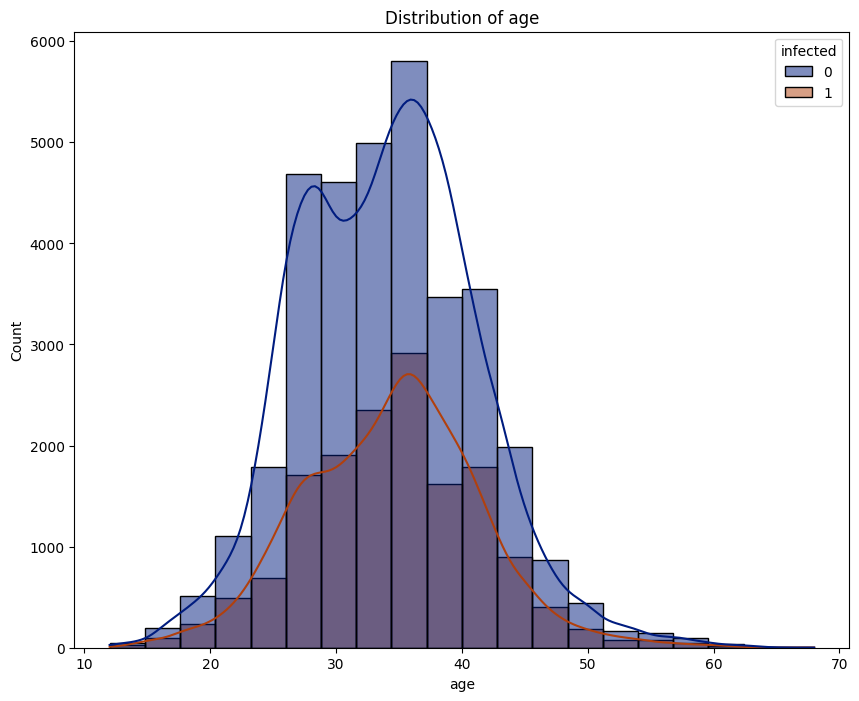

In [88]:
# plotting the histogram of age
plt.figure(figsize=(10, 8))
sns.histplot(x='age', data=df, hue='infected', palette='dark', binrange=[12,68], kde=True, bins=20)
plt.title("Distribution of age")

### 3) Weight Distribution (kg) 

Text(0.5, 0, 'Weight (in kg)')

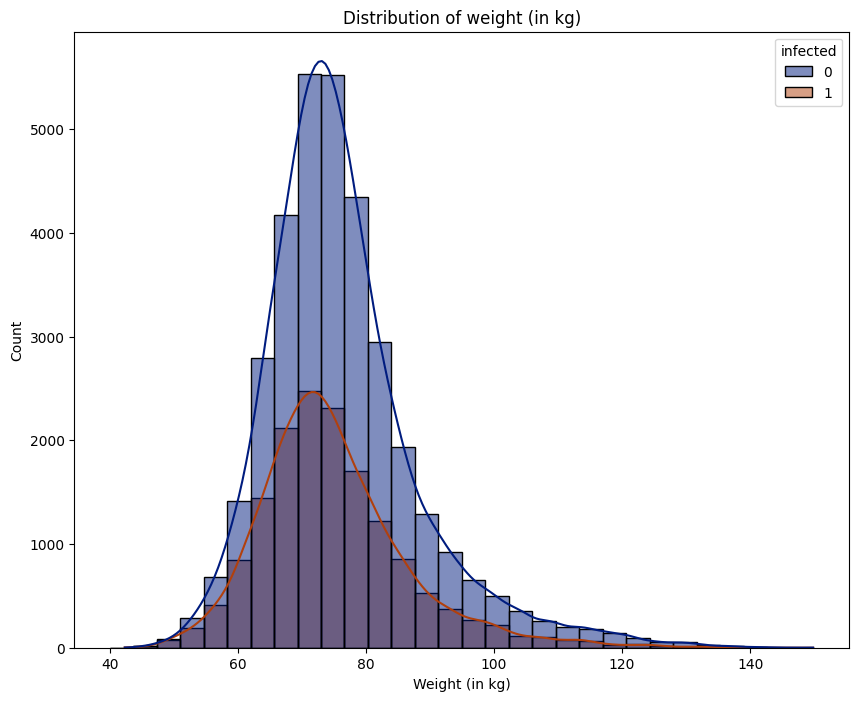

In [89]:
# plotting the histogram of wtkg
plt.figure(figsize=(10, 8))
sns.histplot(x='wtkg', data=df, hue='infected', palette='dark', binrange=[40,150], kde=True, bins=30)
plt.title("Distribution of weight (in kg)")
plt.xlabel("Weight (in kg)")

### 4) Time Distribution

Text(0.5, 0, 'Time (in days)')

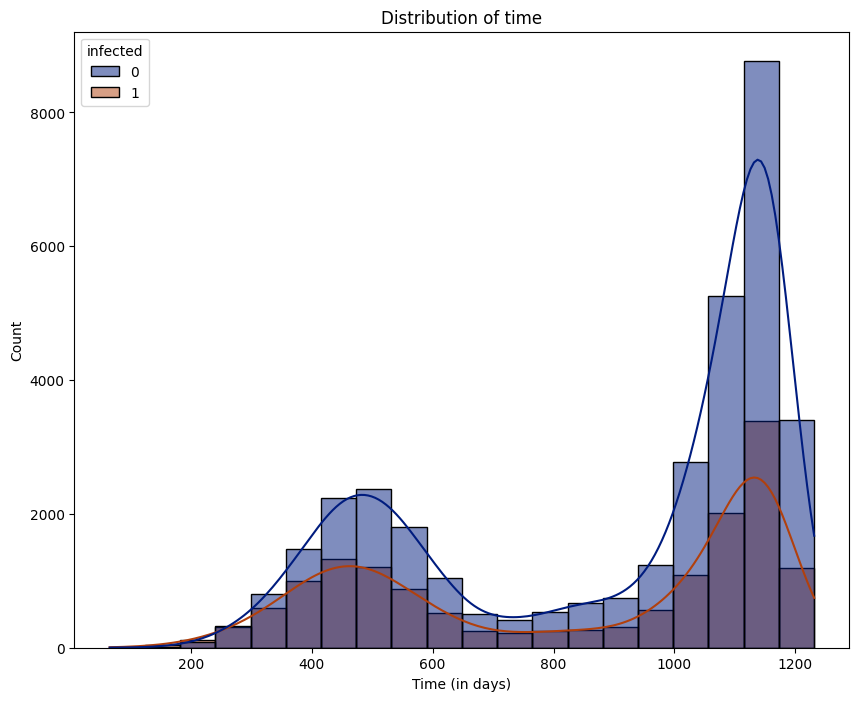

In [90]:
# plotting the time distribution
plt.figure(figsize=(10, 8))
sns.histplot(x='time', data=df, hue='infected', palette='dark', kde=True, bins=20)
plt.title("Distribution of time")
plt.xlabel("Time (in days)")

### 5) Karnofsky score distribution 

Text(0.5, 1.0, 'Distribution of karnofsky score')

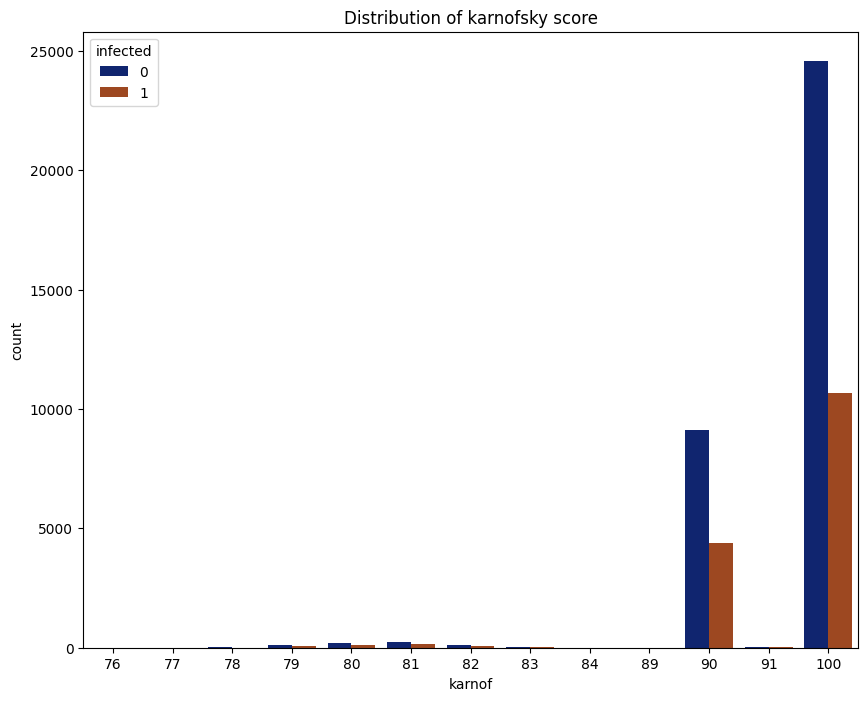

In [91]:
# karnoffsky score distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='karnof', data=df, hue='infected', palette='dark', )
plt.title("Distribution of karnofsky score")


### 6) CD4 subplots

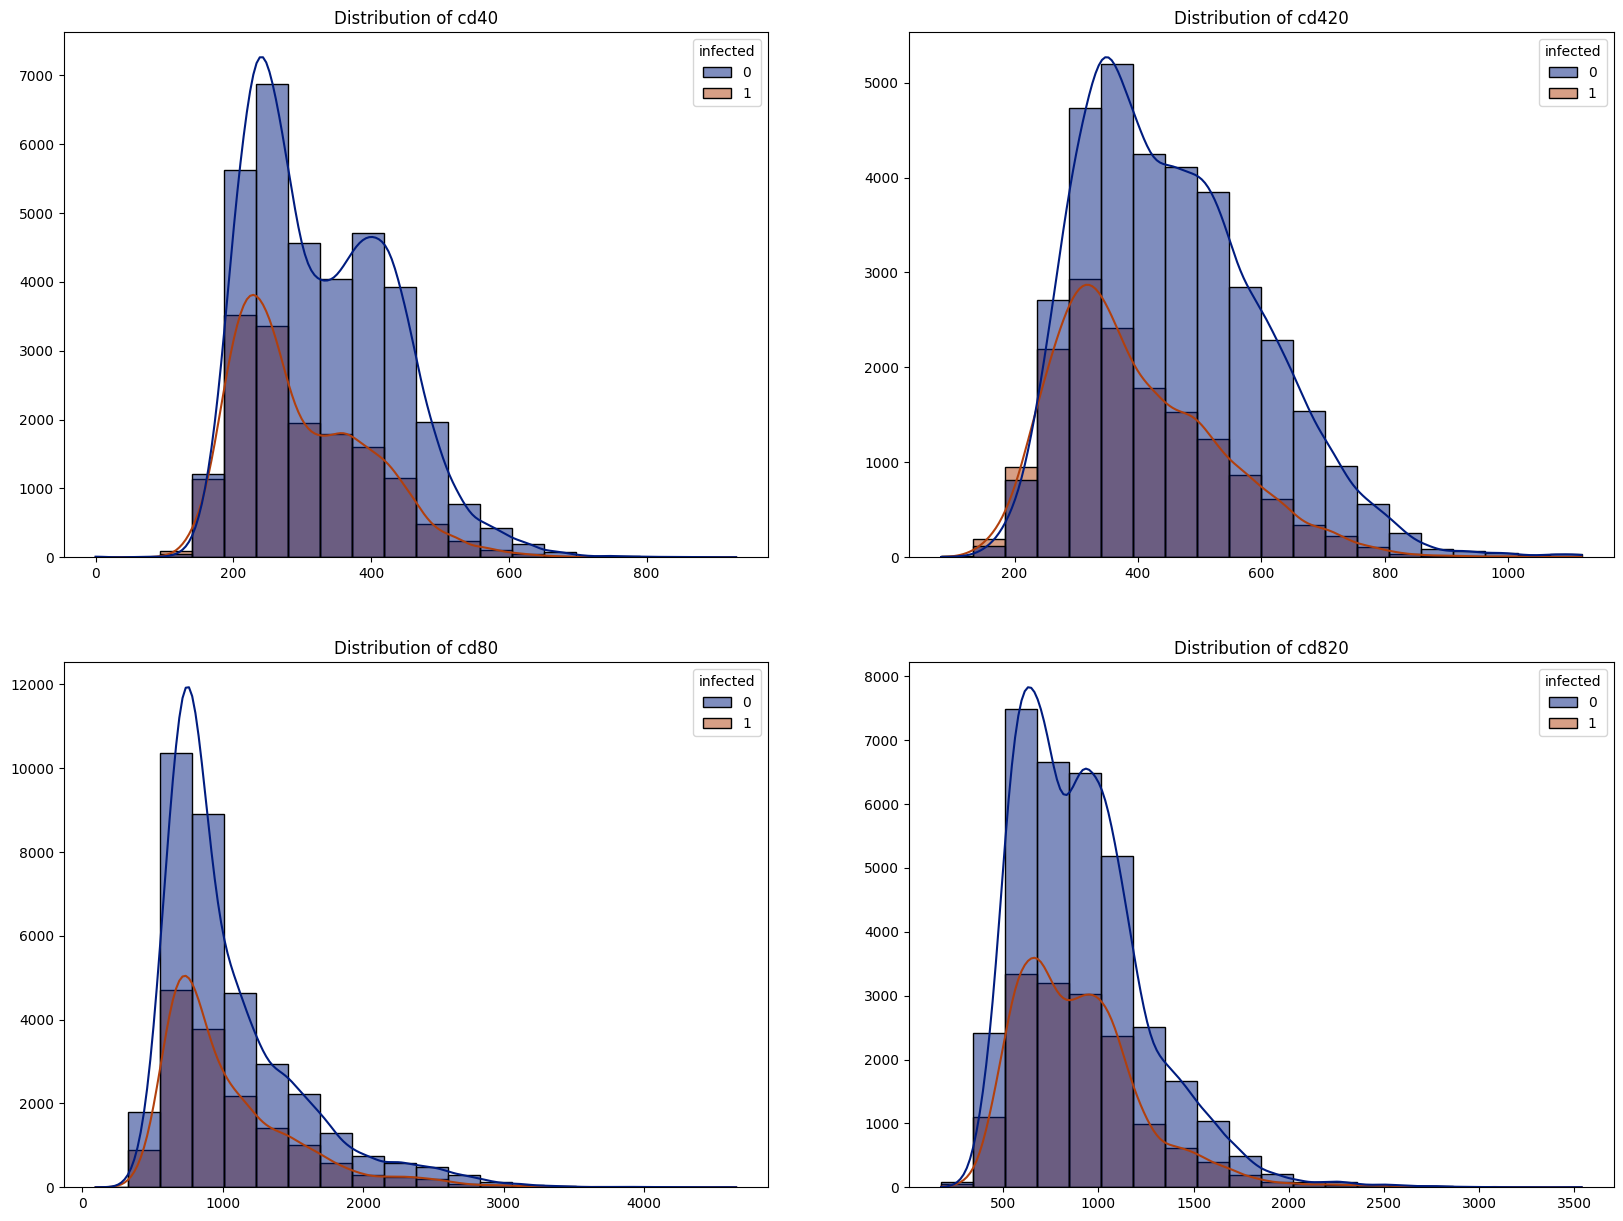

In [92]:
cd4_sub = [col for col in df.columns if col.startswith('cd')]

# plotting the cd4 subplotsd
def subplots_hist(data, cd4_sub,fig_rows, fig_columns, x_axis=20, y_axis=15):
    fig, ax = plt.subplots(fig_rows,fig_columns, figsize=(x_axis, y_axis))
    ax = ax.ravel()
    for i, col in enumerate(cd4_sub):
        sns.histplot(x=col, data=data, hue='infected', palette='dark', kde=True, bins=20, ax=ax[i])
        ax[i].set_title(f"Distribution of {col}")
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)

subplots_hist(df, cd4_sub, 2,2)

### 7) Gender and homosexuality 

| val | gender | homo |
|-----|--------|------|
| 0   | Female | No   |
| 1   | Male   | Yes  |


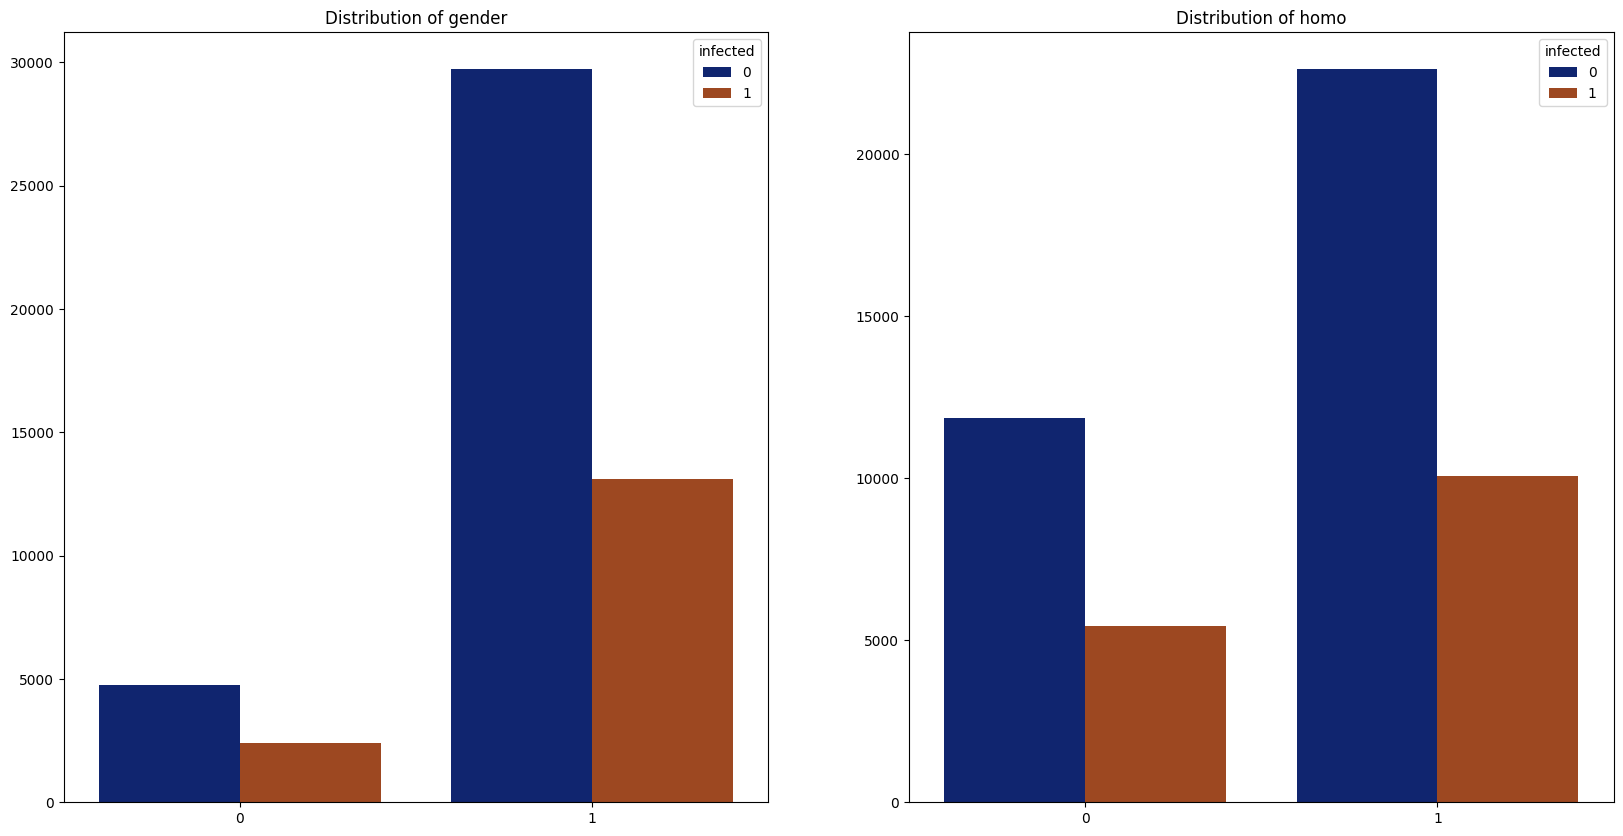

In [93]:
# plotting the gender and homo
gen_homo_list = ['gender', 'homo']

def subplots_count(data, col_list ,hue_target,fig_rows, fig_columns, x_axis=20, y_axis=15 ):
    fig, ax = plt.subplots(fig_rows,fig_columns, figsize=(x_axis, y_axis))
    ax = ax.ravel()
    for i, col in enumerate(col_list):
        sns.countplot(x=col, data=data, hue=hue_target, palette='dark', ax=ax[i])
        ax[i].set_title(f"Distribution of {col}")
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)

subplots_count(df,gen_homo_list,'infected', 1,2, 20, 10)

### 8) treatment and off treatment

 | val  |   treat   |   offtrt                      |
 |------|-----------|-------------------------------|
 |  0   |   no res. |   patient is on treatment     |
 |  1   |   response|   patient stopped treatment   |

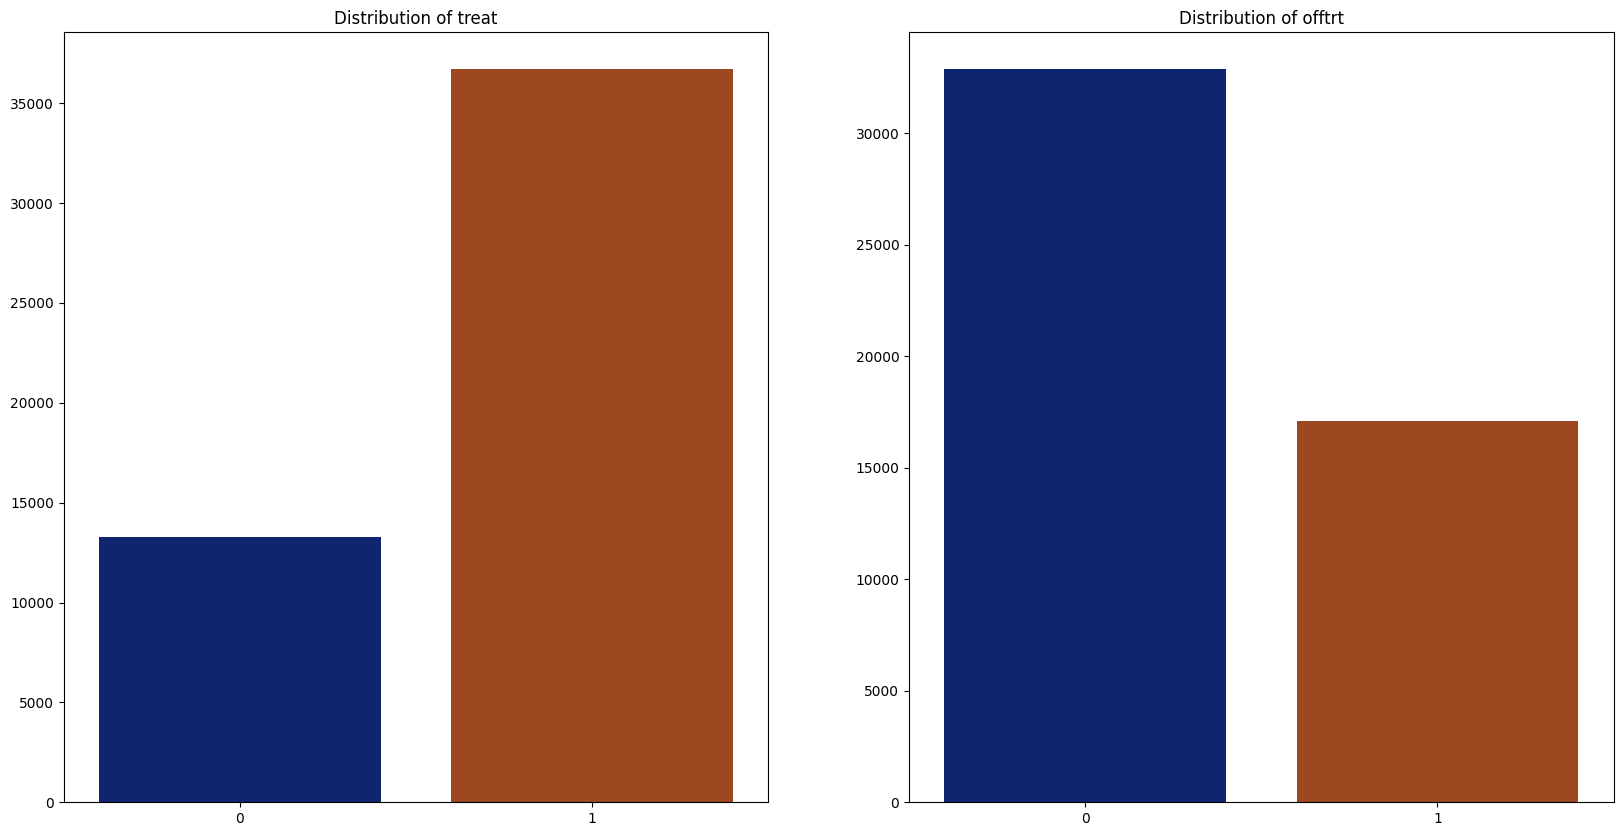

In [94]:
trt_offtrt_col = ['treat', 'offtrt']
subplots_count(df,trt_offtrt_col,None,1,2, 20, 10)

### 9) Race, Drugs, hemophilia, 

 | Val  |   Race        | drugs |   hemo    |
 |------|---------------|-------|-----------|
 |  0   |   Non-white   |   no  |   no      |
 |  1   |   White       |   yes |   yes     |   

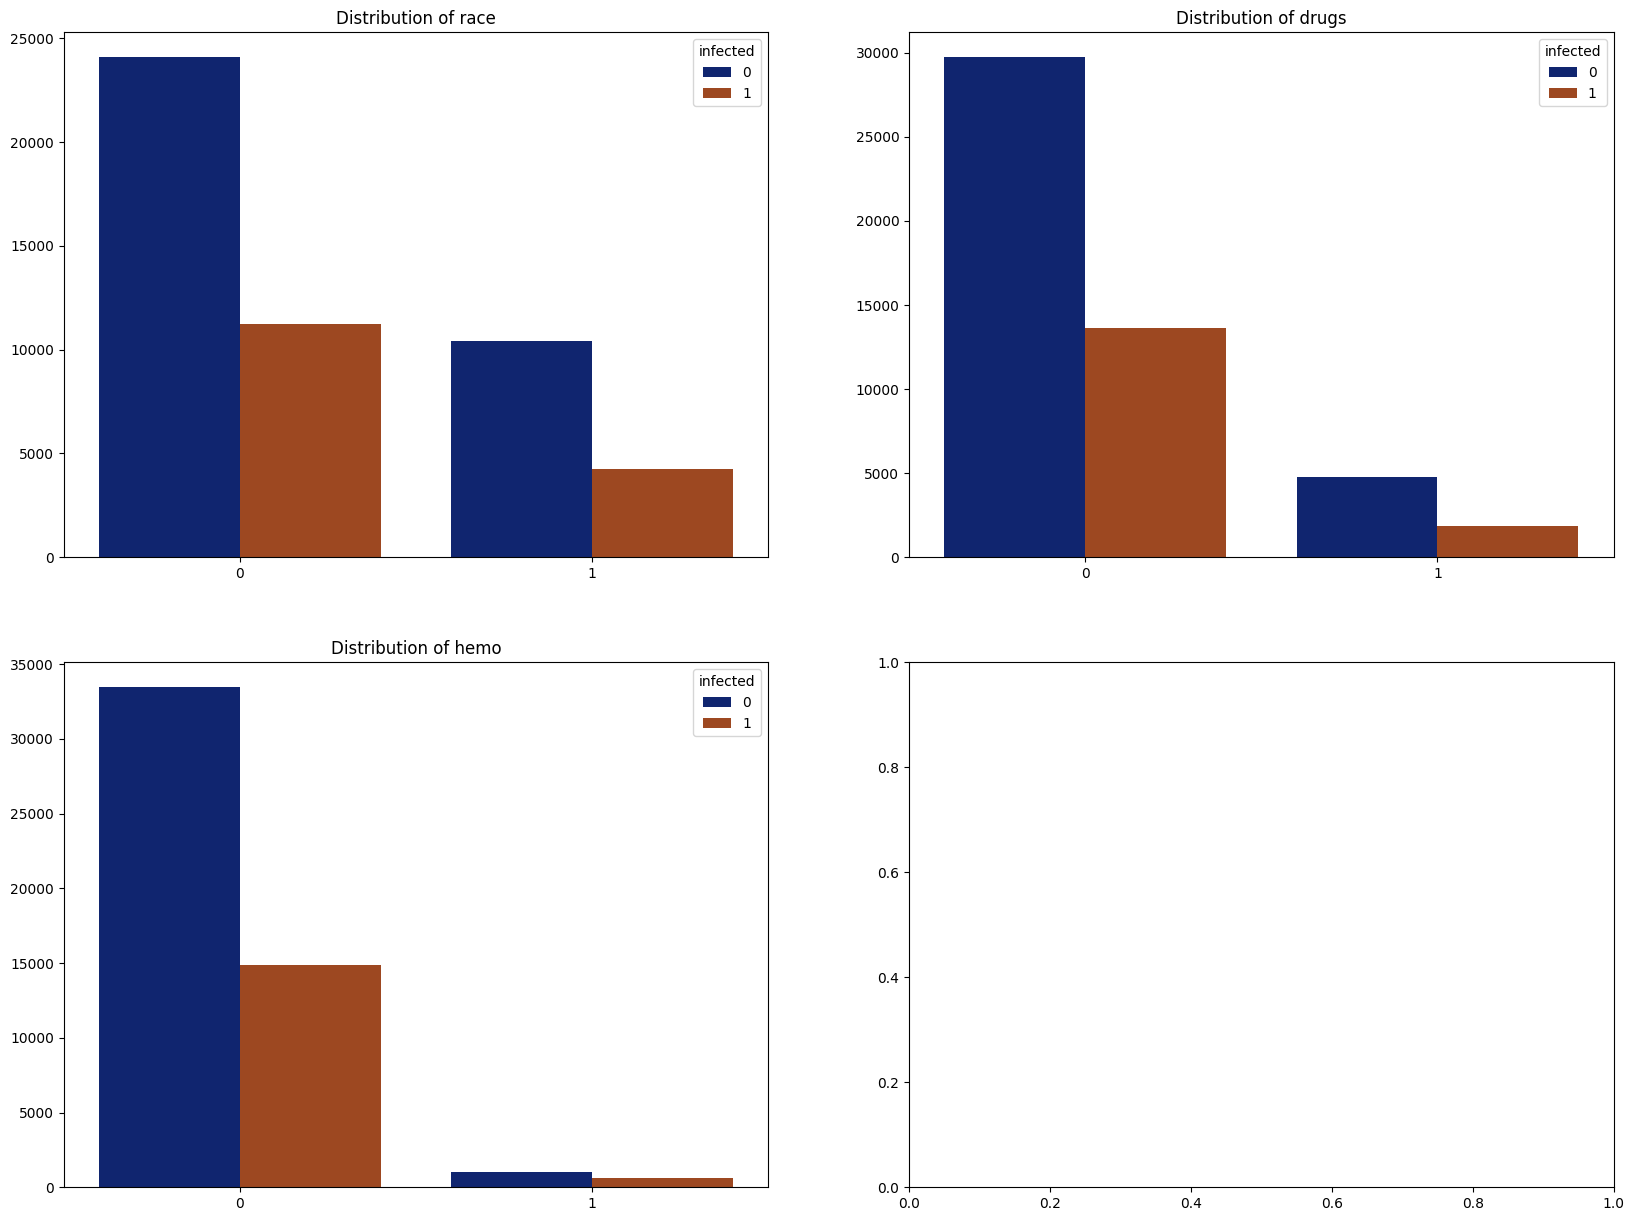

In [95]:
R_D_Hemo_col = ['race', 'drugs', 'hemo']
subplots_count(df, R_D_Hemo_col,'infected',2,2)

### 10) Preanti -> Months before antiviral retro therapy.

Text(0.5, 0, 'Preanti')

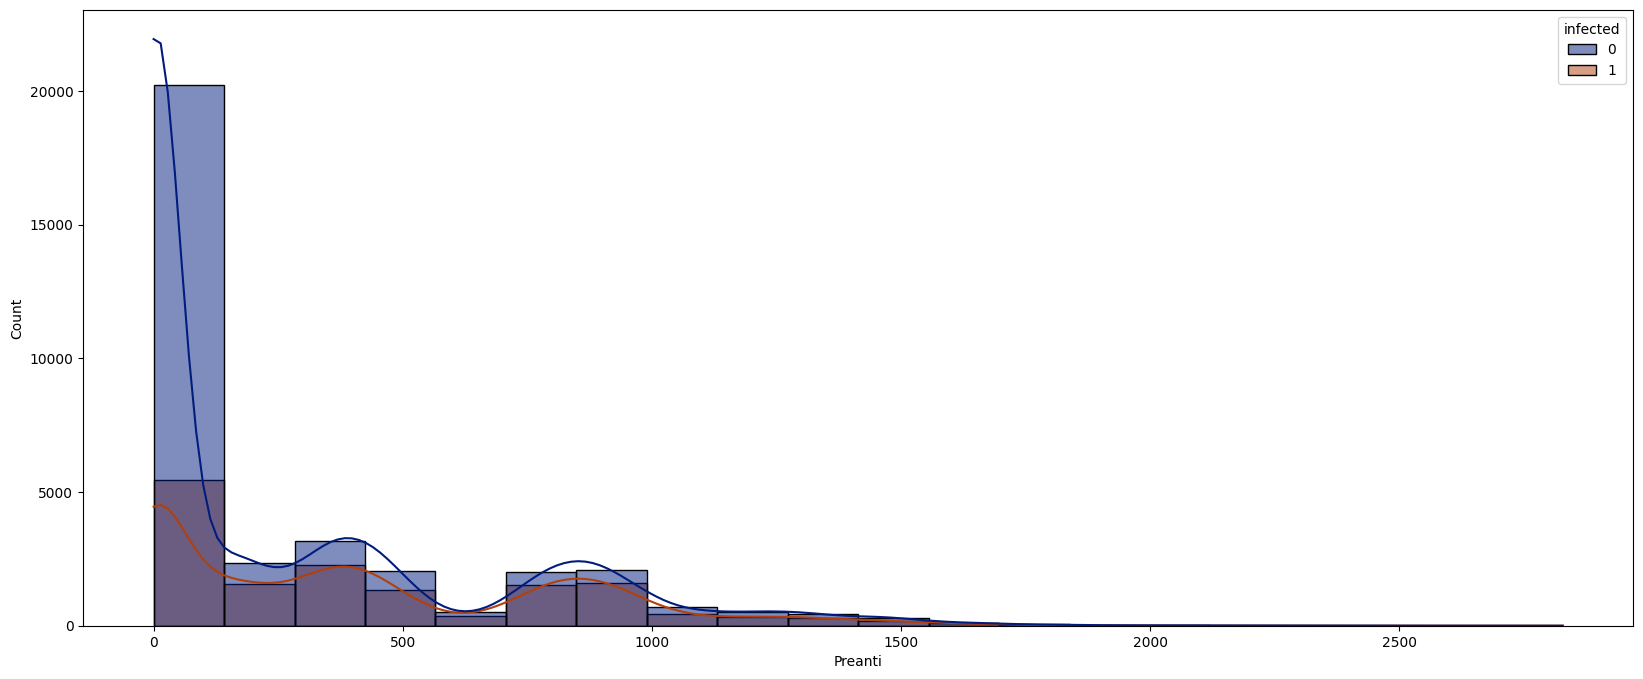

In [96]:
# plotting the histogram for preanti
plt.figure(figsize=(20,8))
sns.histplot(x='preanti', data=df, kde=True, hue='infected', palette='dark', bins=20)
plt.xlabel('Preanti')

### 11) oprior, z30, symptoms, str2 and strat

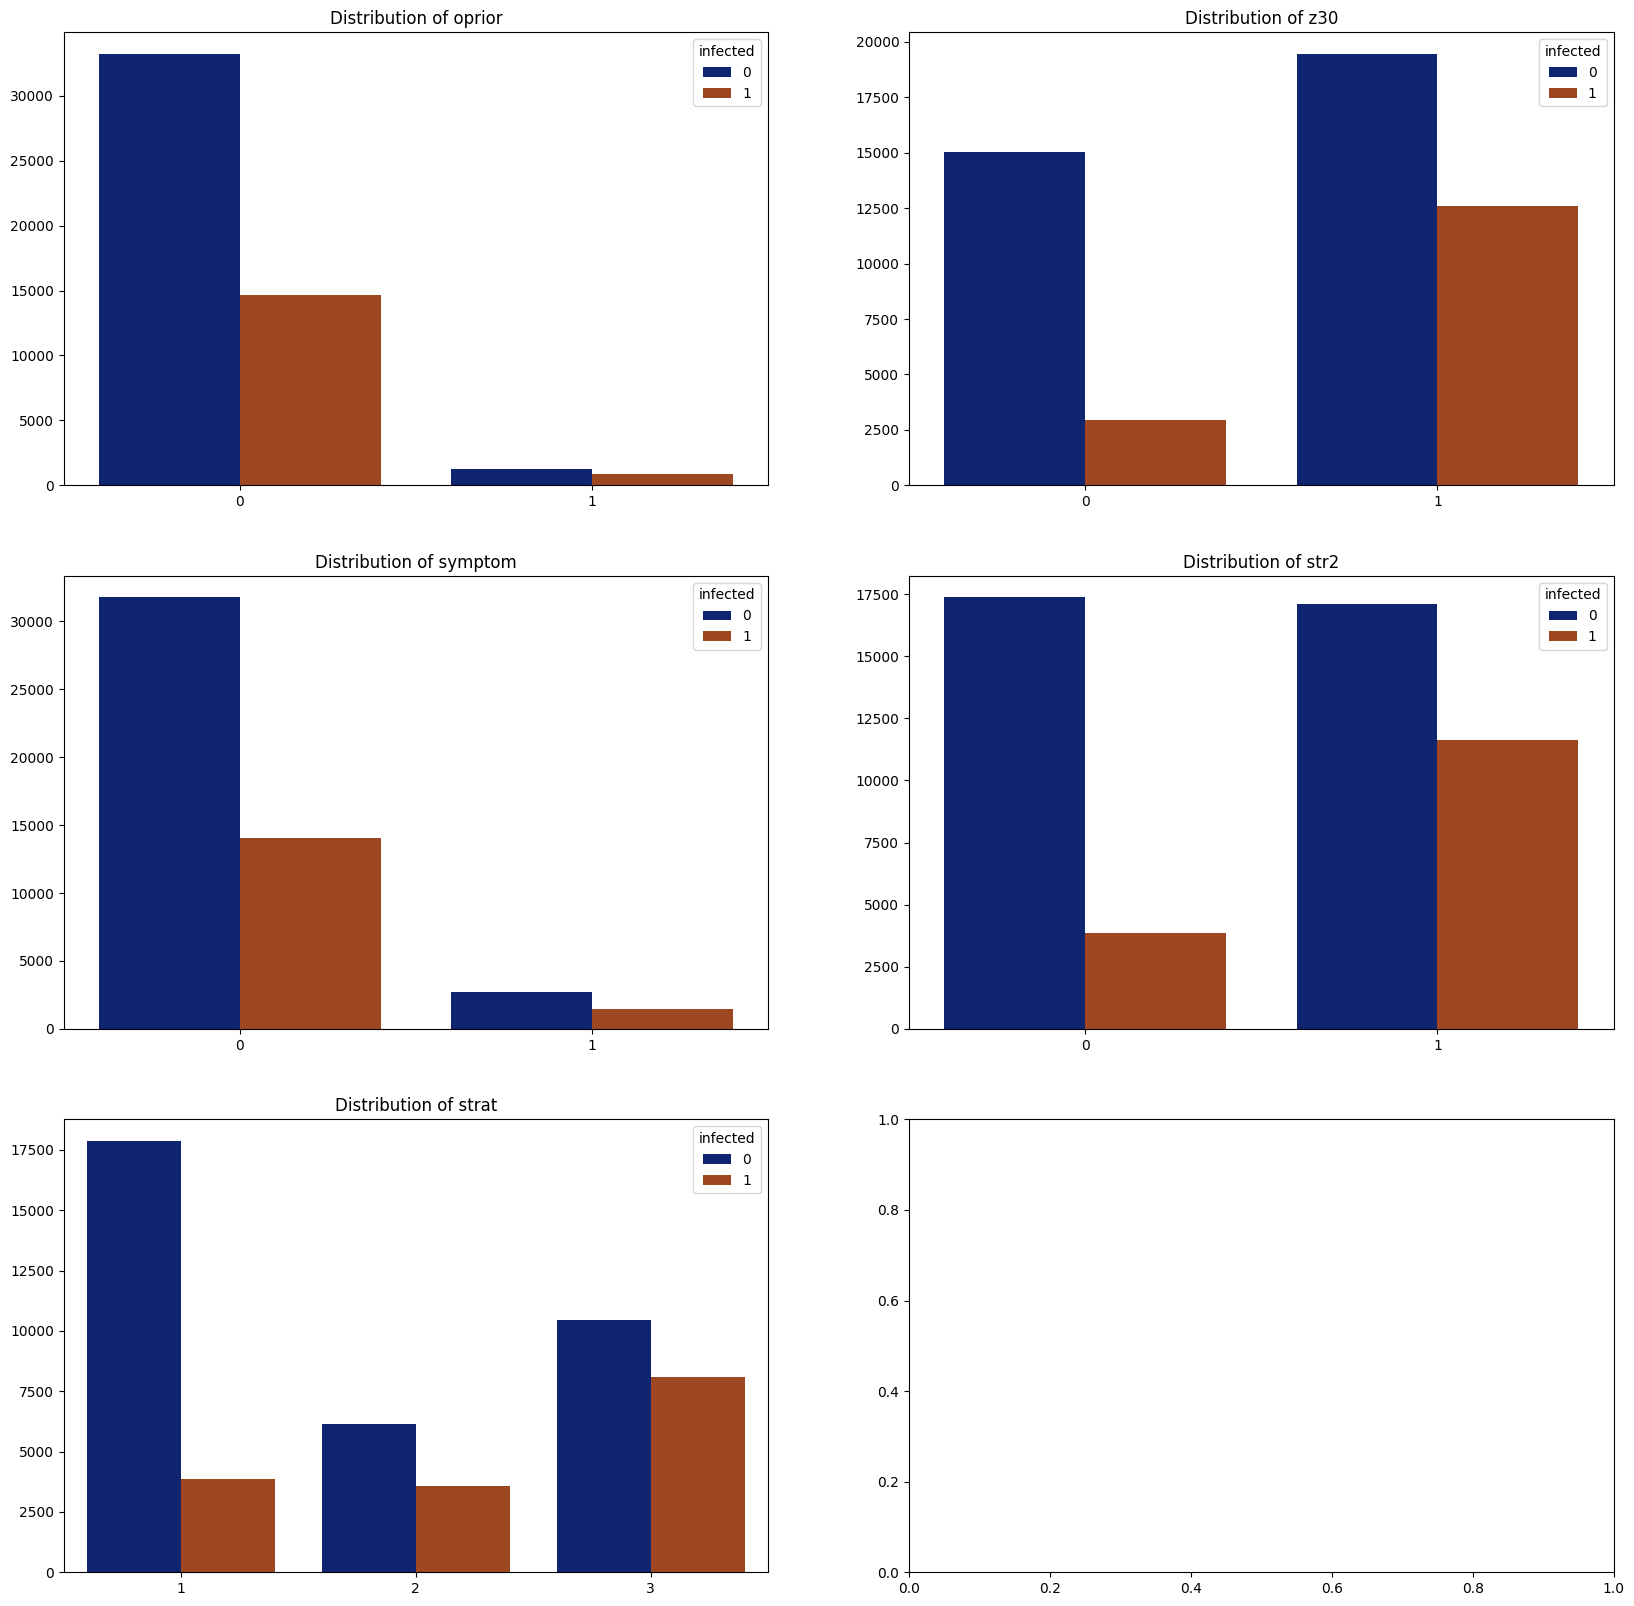

In [97]:
op_z_sym_str2_strat_col = ['oprior', 'z30', 'symptom', 'str2', 'strat']
subplots_count(df,op_z_sym_str2_strat_col,'infected', 3,2,20,20)

### 12) Correlation matix

Text(0.5, 1.0, 'Correlation matirx')

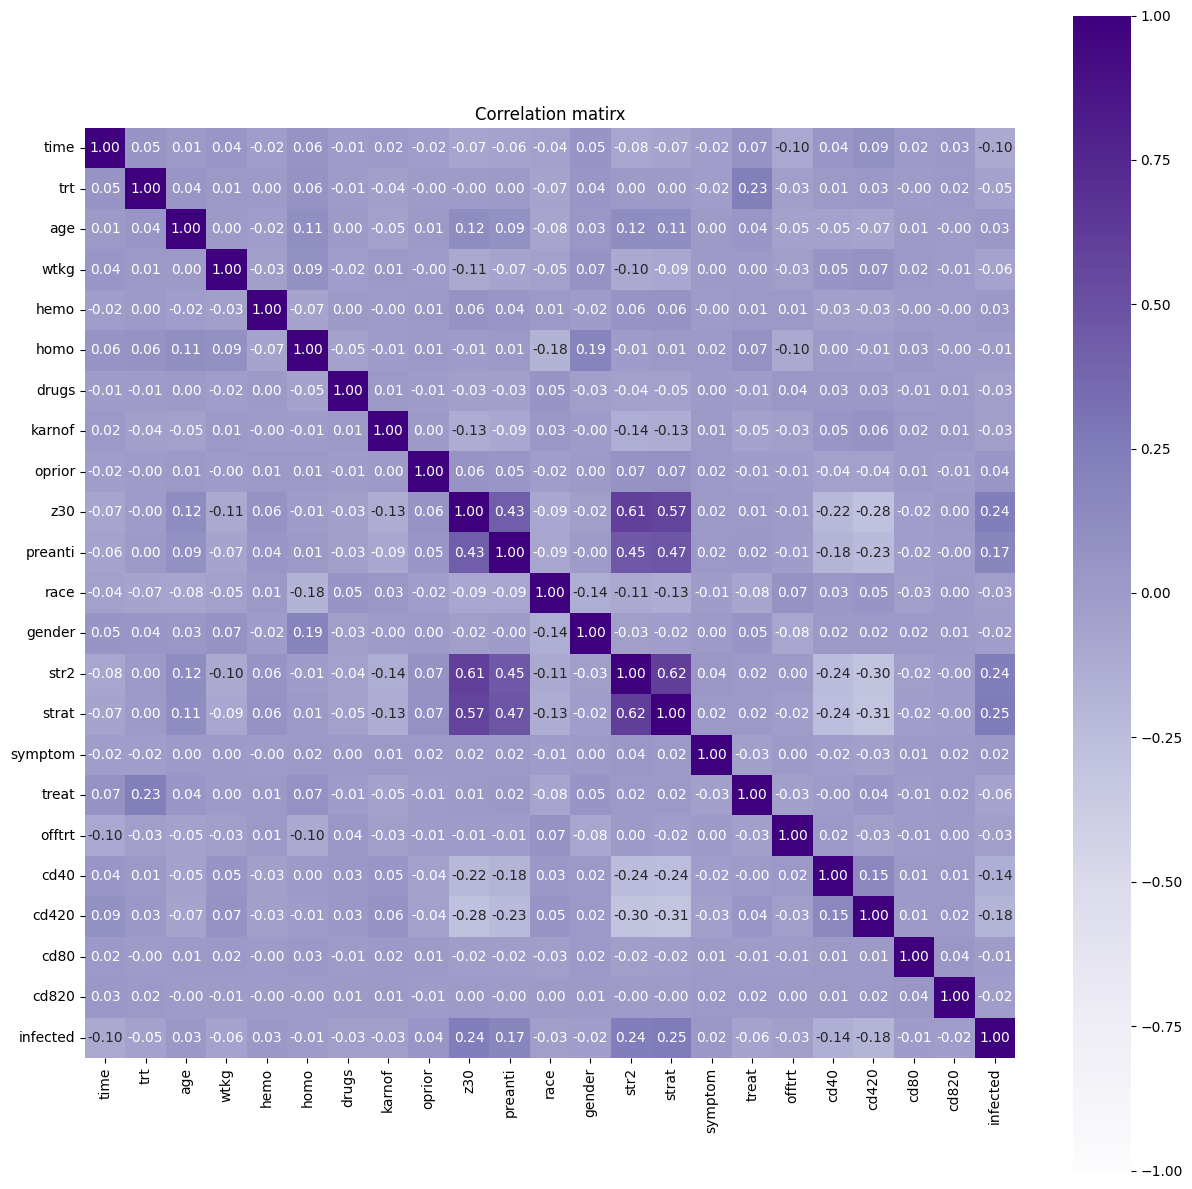

In [98]:
corr = df.corr()

# plotting the heatmap of correlation
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cbar=True,cmap='Purples', vmin=-1,vmax=1,square=True, fmt='.2f')
plt.title('Correlation matirx')

- `str2`, `strat`, `z30`, `preanti` showing the **highest correlation.** 

# Feature Engineering (Adding new features)

In [99]:
# changing the year into catagories
def cata_year(year):
    if year == 2021:
        return 1
    elif year == 2022:
        return 2
    elif year == 2023:
        return 3
    elif year == 2024:
        return 4
    else:
        return -1

# changing the month into seasons (summer, rainy, and winter)
def cata_month(month):
    if month in [11,12,1,2]:
        return 1    # 1 = winter
    elif month in [3,4,5,6]:
        return 2    # 2 = summer
    elif month in [7,8,9,10]:
        return 3    # 3 = rainy
    else:
        return -1
    
def age_group(age):
    if age < 18:
        return 0   # Underage
    elif 18 <= age <= 25:
        return 1   # Young Adult
    elif 26 <= age <= 40:
        return 2   # Adult
    elif 41 <= age <= 60:
        return 3   # Middle-Aged
    else:
        return 4   # Senior Citizen

def is_overweight(age, weight):
    if age < 18:
        return 1 if weight > 70 else 0  # underage-> 70+ kg overweight
    elif 18 <= age <= 25:
        return 1 if weight > 85 else 0  # Young adults-> 85+ kg overweight
    elif 26 <= age <= 40:
        return 1 if weight > 95 else 0  # Adults-> 95+ kg overweight
    elif 41 <= age <= 60:
        return 1 if weight > 90 else 0  # Middle-aged-> 90+ kg overweight
    else:
        return 1 if weight > 80 else 0  # Senior citizens-> 80+ kg overweight
    
def new_features(data):
    # changing time into day, month, year 
    basline_date = pd.to_datetime('2021-05-31')
    data['result_date'] = basline_date + pd.to_timedelta(data['time'], unit='D')
    data['day'] = data['result_date'].dt.day
    data['month'] = data['result_date'].dt.month
    data['year'] = data['result_date'].dt.year
    data['year'] = data['year'].apply(cata_year)
    df['season'] = df['month'].apply(cata_month)
    data.drop(['time','result_date'], axis=1, inplace=True)

    # changing age into age group
    data['age_group'] = data['age'].apply(age_group)

    # changing weight into overweight
    data['overweight'] = data.apply(lambda x: is_overweight(x['age'], x['wtkg']), axis=1)

    # weight per age
    data['weight_per_age'] = data['wtkg'] / data['age']

    # karnoffsky score per age
    data['karnof_per_age'] = data['karnof'] / data['age']

    # homo - drugs interaction
    data['homo_drugs_interaction'] = data['homo'] * data['drugs']

    # hemo_homo_interaction
    data['hemo_homo_interaction'] = data['hemo'] * data['homo']

    # hemo_homo and drugs interaction
    data['hhd_interaction'] = data['hemo_homo_interaction'] * data['drugs']

    # creating male and female cols and checking the homosexuality 
    data['male'] = (data['gender'] == 1).astype(int)
    data['female'] = (data['gender'] == 0).astype(int)
    data['homo_male'] = data['male'] * data['homo']
    data['homo_female'] = data['female'] * data['homo']

    # male/female infected interaction
    data['m_inf'] = data['male'] * data['infected']
    data['f_inf'] = data['female'] * data['infected']
    
    # homo male and female infection interaction
    data['homo_m_inf'] = data['homo_male'] * data['infected']
    data['homo_f_inf'] = data['homo_female'] * data['infected']
    return data


In [100]:
new_features(df)

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,hemo_homo_interaction,hhd_interaction,male,female,homo_male,homo_female,m_inf,f_inf,homo_m_inf,homo_f_inf
0,1,37,79.46339,0,1,0,100,0,1,18,...,0,0,1,0,1,0,1,0,1,0
1,0,33,73.02314,0,1,0,90,0,1,224,...,0,0,1,0,1,0,1,0,1,0
2,1,43,69.47793,0,1,0,100,0,1,0,...,0,0,0,1,0,1,0,1,0,1
3,3,42,89.15934,0,1,0,100,1,1,513,...,0,0,1,0,1,0,1,0,1,0
4,0,37,137.46581,0,1,0,100,0,0,4,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,46,61.28204,0,0,0,90,0,1,1089,...,0,0,0,1,0,0,0,0,0,0
49996,0,42,73.36768,0,1,0,100,0,1,312,...,0,0,1,0,1,0,0,0,0,0
49997,0,40,78.75824,0,1,0,100,0,1,0,...,0,0,1,0,1,0,0,0,0,0
49998,0,31,52.20371,0,0,0,100,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [101]:
df.columns

Index(['trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior',
       'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat',
       'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'infected', 'day', 'month',
       'year', 'season', 'age_group', 'overweight', 'weight_per_age',
       'karnof_per_age', 'homo_drugs_interaction', 'hemo_homo_interaction',
       'hhd_interaction', 'male', 'female', 'homo_male', 'homo_female',
       'm_inf', 'f_inf', 'homo_m_inf', 'homo_f_inf'],
      dtype='object')

<Axes: >

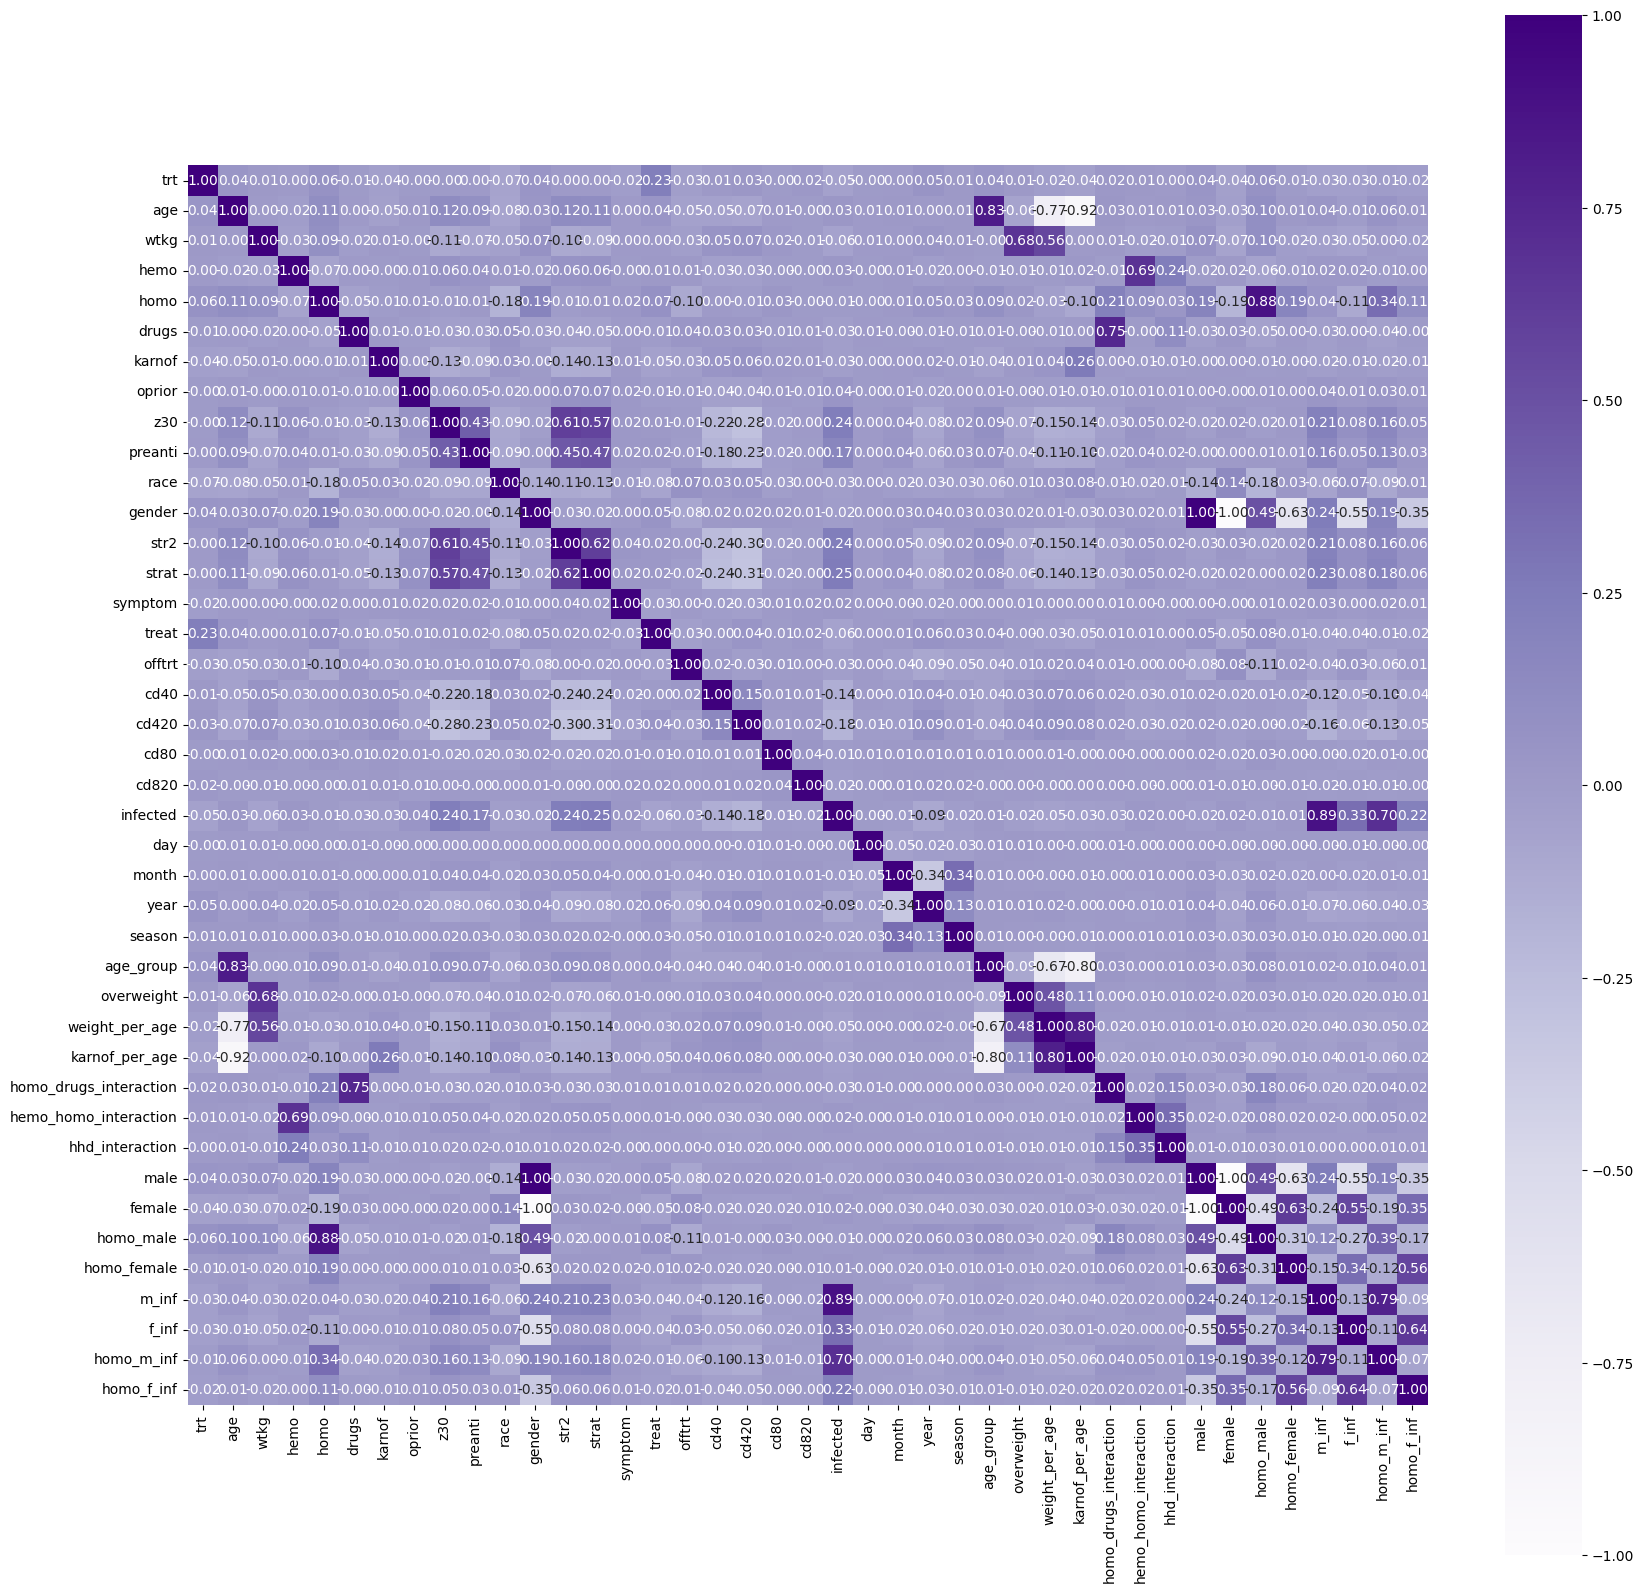

In [102]:
corr_new = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_new, annot=True, cbar=True,cmap='Purples', vmin=-1,vmax=1,square=True, fmt='.2f')

# checking the Mutual information

In [103]:
df_copy = df.copy()

In [104]:
mi_x = df_copy.drop('infected', axis=1)
mi_y = df_copy['infected']

mi = mutual_info_classif(mi_x, mi_y, random_state=10)
mi_df = pd.DataFrame(mi, index = mi_x.columns, columns=['Mutual_info'])
mi_df = mi_df.sort_values(by='Mutual_info', ascending=False)
mi_df

,Mutual_info
m_inf,0.445687
homo_m_inf,0.263112
f_inf,0.057522
strat,0.036847
str2,0.036148
z30,0.033838
preanti,0.026885
homo_f_inf,0.023307
cd420,0.021241
cd40,0.012339


# Outliers (IQR method)

In [105]:
def calc_IQR(data):
    outliers_record = []

    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        # Inter Quartile Range
        IQR = Q3 - Q1

        # calculating lower and upper bond
        lower_bond = Q1 - (1.5 * IQR)
        upper_bond = Q3 + (1.5 * IQR)

        outliers = data[(data[col] < lower_bond) | (data[col] > upper_bond)]
        outliers_count = len(outliers)
        
        outliers_record.append(
            {
                'Column': col,
                'Lower Bond': lower_bond,
                'Upper Bond': upper_bond,
                'Outliers Count': outliers_count
            }
        )

    outlier_df = pd.DataFrame(outliers_record)
    return outlier_df



In [106]:
calc_IQR(df)

,Column,Lower Bond,Upper Bond,Outliers Count
0,trt,-4.500000,7.500000,0
1,age,14.000000,54.000000,358
2,wtkg,48.920929,100.474939,2237
3,hemo,0.000000,0.000000,1674
4,homo,-1.500000,2.500000,0
5,drugs,0.000000,0.000000,6611
6,karnof,75.000000,115.000000,0
7,oprior,0.000000,0.000000,2115
8,z30,-1.500000,2.500000,0
9,preanti,-754.500000,1257.500000,1621


# Modeling

In [107]:
del_cols = ['age', 'day', 'hhd_interaction', 'homo_drugs_interaction', 'hemo_homo_interaction', 'infected']

In [111]:
X = df.drop(columns=del_cols, axis=1)
y = df['infected']

In [116]:
print(X.shape, y.shape)

(50000, 35) (50000,)


### function to train different models

In [131]:
# dictionary of models

models_dict = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

def train_models(data_X,data_y,models):
    model_performance = []

    # splitting the data 
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=20)

    for model_name, model in models.items():
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        r_score = recall_score(y_test, y_test_pred)
        acc_score = accuracy_score(y_test,y_test_pred)
        f1 = f1_score(y_test,y_test_pred)
        precision = precision_score(y_test, y_test_pred)

        model_performance.append({
            'model': model_name,
            'accuracy': acc_score,
            'f1': f1,
            'recall_score': r_score,
            'precision': precision
        })
    
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

    performance = pd.DataFrame(model_performance)

    return performance


In [132]:
train_models(X,y, models_dict)

X_train shape: (35000, 35), X_test shape: (15000, 35)
y_train shape: (35000,), y_test shape: (15000,)


,model,accuracy,f1,recall_score,precision
0,LogisticRegression,0.932333,0.885917,0.846617,0.929043
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
2,XGBoost,1.000000,1.000000,1.000000,1.000000
3,LightGBM,1.000000,1.000000,1.000000,1.000000
